In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(pd.__version__)
print(np.__version__)

1.5.3
1.25.2


In [2]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = pd.Series(iris.target, dtype = str)
iris_df['group'] = pd.Series([iris.target_names[k] for k in iris.target], dtype='category')
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,group
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


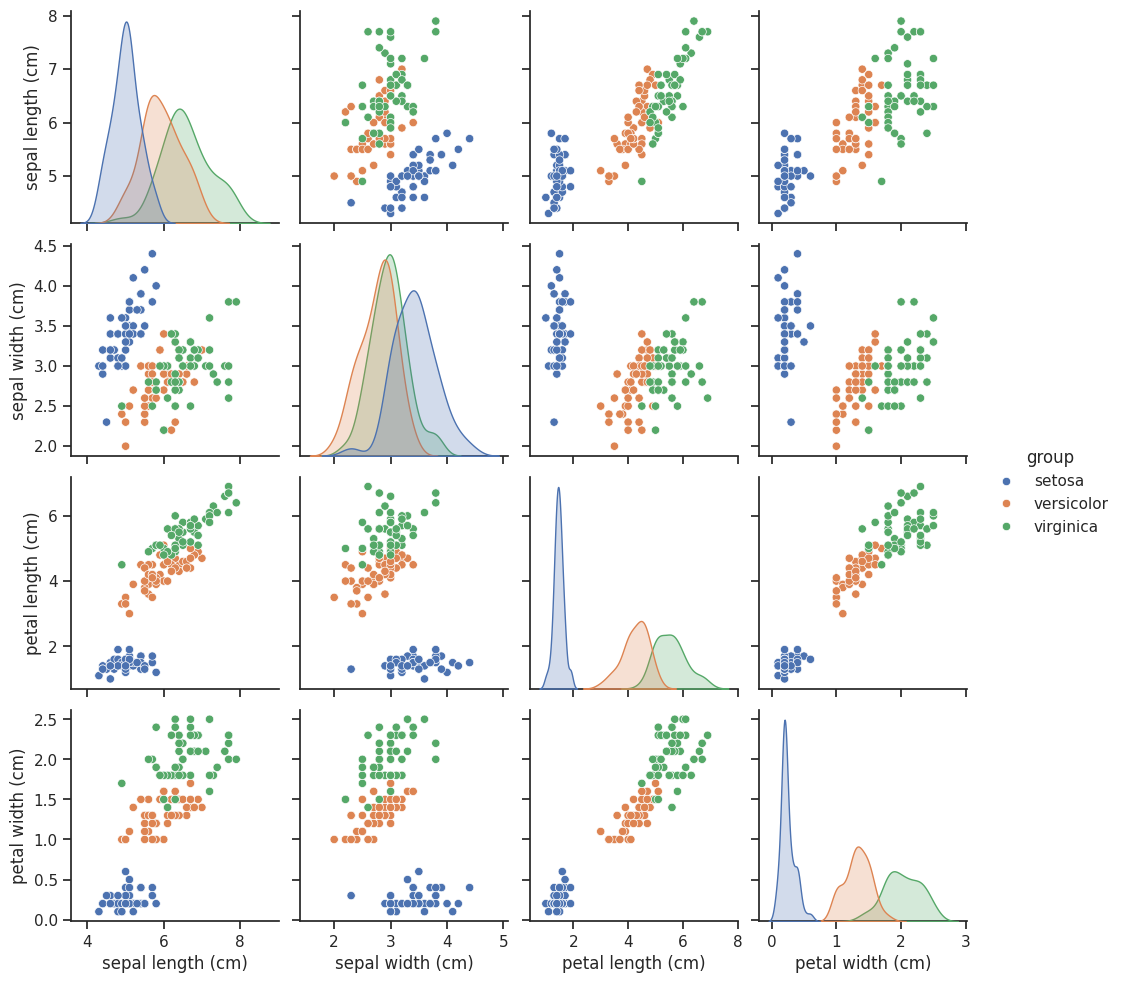

In [4]:

import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(iris_df, hue="group")

<ipython-input-5-982bdf6a96d7>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataframe.corr()


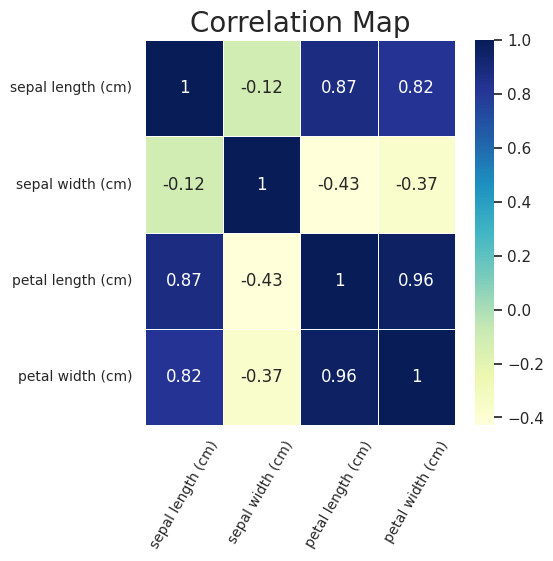

In [5]:
import seaborn as sns; sns.set()

def correlated_map(dataframe, plot=False):
    corr = dataframe.corr()
    if plot:
        sns.set(rc={'figure.figsize': (5, 5)})
        sns.heatmap(corr, cmap="YlGnBu", annot=True, linewidths=.7)  # тепловая карта коррелляций
        plt.xticks(rotation=60, size=10)
        plt.yticks(size=10)
        plt.title('Correlation Map', size=20)
        plt.show()

correlated_map(iris_df[iris_df.columns], plot=True)

# Naive Bayes

In [6]:
X = iris_df.iloc[:,0:3]
X

,sepal length (cm),sepal width (cm),petal length (cm)
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
...,...,...,...
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,5.2
148,6.2,3.4,5.4


In [7]:
y = iris_df['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: object

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33
)

In [9]:
np.array(X_test)

array([[6.6, 2.9, 4.6],
       [4.4, 3. , 1.3],
       [6.1, 3. , 4.6],
       [5.7, 2.8, 4.5],
       [7.7, 2.6, 6.9],
       [4.4, 3.2, 1.3],
       [5.2, 4.1, 1.5],
       [5.7, 2.8, 4.1],
       [5. , 3.2, 1.2],
       [6.1, 2.8, 4.7],
       [6.4, 3.1, 5.5],
       [4.6, 3.1, 1.5],
       [5.6, 3. , 4.5],
       [6.2, 2.9, 4.3],
       [4.9, 3.1, 1.5],
       [6.9, 3.2, 5.7],
       [5.4, 3. , 4.5],
       [5.1, 3.5, 1.4],
       [5.1, 3.8, 1.6],
       [6.2, 2.8, 4.8],
       [5.8, 2.7, 3.9],
       [6.1, 2.6, 5.6],
       [6.3, 2.8, 5.1],
       [4.6, 3.6, 1. ],
       [6.4, 2.8, 5.6],
       [6.3, 2.5, 5. ],
       [5.5, 2.3, 4. ],
       [4.5, 2.3, 1.3],
       [6. , 2.2, 5. ],
       [5.5, 2.5, 4. ],
       [5.1, 2.5, 3. ],
       [5. , 2.3, 3.3],
       [7.7, 2.8, 6.7],
       [4.9, 3.6, 1.4],
       [5.6, 2.7, 4.2],
       [6.2, 3.4, 5.4],
       [4.8, 3.1, 1.6],
       [5.6, 2.9, 3.6],
       [5.4, 3.9, 1.3],
       [5. , 3.5, 1.3],
       [4.9, 2.4, 3.3],
       [6. , 2.9

In [10]:
np.array(y_test)

array(['1', '0', '1', '1', '2', '0', '0', '1', '0', '1', '2', '0', '1',
       '1', '0', '2', '1', '0', '0', '2', '1', '2', '2', '0', '2', '2',
       '1', '0', '2', '1', '1', '1', '2', '0', '1', '2', '0', '1', '0',
       '0', '1', '1', '2', '2', '2', '1', '2', '1', '0', '2'],
      dtype=object)

In [11]:
# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
predicted = model.predict([np.array(X_test)[1]])

print("Actual Value:", np.array(y_test)[1])
print("Predicted Value:", predicted[0])

Actual Value: 0
Predicted Value: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [12]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuraсy = accuracy_score(y_pred, y_test)

print("Accuracy:", accuraсy)

Accuracy: 0.9


# Support Vector Machine (SVM) (Метод опорных векторов)

In [13]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [14]:
predicted = clf.predict([np.array(X_test)[1]])

print("Actual Value:", np.array(y_test)[1])
print("Predicted Value:", predicted[0])

Actual Value: 0
Predicted Value: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [15]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.96


In [16]:
prediction = clf.predict(X_test)
prediction

array(['1', '0', '1', '1', '2', '0', '0', '1', '0', '1', '2', '0', '1',
       '1', '0', '2', '2', '0', '0', '1', '1', '2', '2', '0', '2', '2',
       '1', '0', '2', '1', '1', '1', '2', '0', '1', '2', '0', '1', '0',
       '0', '1', '1', '2', '2', '2', '1', '2', '1', '0', '2'],
      dtype=object)

In [17]:
from sklearn.metrics import classification_report
print(f'Classification Report: \n {classification_report(y_test, prediction)}')

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.95      0.95      0.95        19
           2       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [19]:
# Используем Grid Search для поиска лучших гиперпараметров
parameters = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf', 'linear']}

svc = SVC()

clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf', 'linear']})

In [20]:
print('SVM best Params:', clf.best_params_)
print('SVM best Score:', clf.best_score_)

SVM best Params: {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
SVM best Score: 0.96


In [21]:
svm_y_pred = clf.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, svm_y_pred))
print('Classification Report:\n', classification_report(y_test, svm_y_pred))

Accuracy Score: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.95      0.95      0.95        19
           2       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



# Деревья решений

In [24]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   target             150 non-null    object  
 5   group              150 non-null    category
dtypes: category(1), float64(4), object(1)
memory usage: 6.3+ KB


In [26]:
list(set(iris_df['target']))

['0', '1', '2']

In [27]:
list(set(iris_df['group']))

['virginica', 'versicolor', 'setosa']

In [29]:
first_row = iris_df.iloc[0]
first_row

sepal length (cm)       5.1
sepal width (cm)        3.5
petal length (cm)       1.4
petal width (cm)        0.2
target                    0
group                setosa
Name: 0, dtype: object

In [30]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

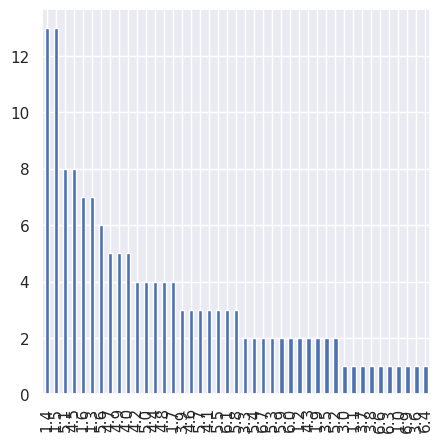

In [31]:
iris_df['petal length (cm)'].value_counts().plot(kind='bar')

<Axes: >

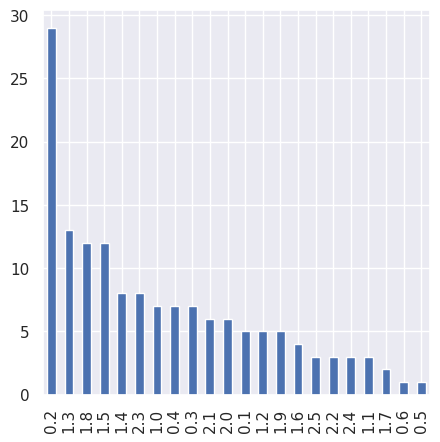

In [32]:
iris_df['petal width (cm)'].value_counts().plot(kind='bar')

<Axes: >

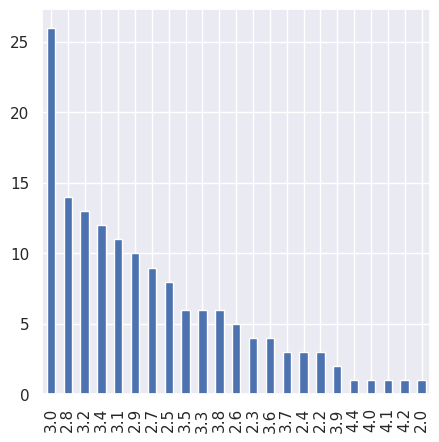

In [33]:
iris_df['sepal width (cm)'].value_counts().plot(kind='bar')

<Axes: >

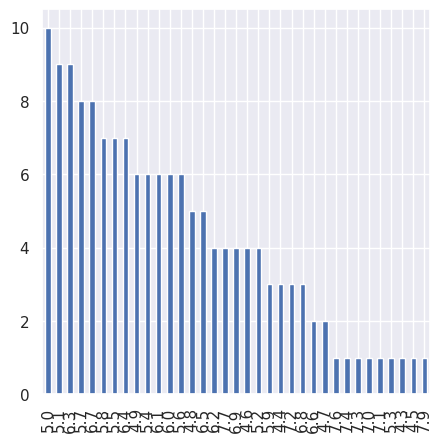

In [34]:
iris_df['sepal length (cm)'].value_counts().plot(kind='bar')

In [43]:
# делим данные 2
X = iris_df.iloc[:,0:4]
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33
)

In [45]:
from sklearn.tree import DecisionTreeClassifier

first_tree = DecisionTreeClassifier(random_state=13, max_depth=2)
first_tree

DecisionTreeClassifier(max_depth=2, random_state=13)

In [46]:
try:
  first_tree.fit(X_train, y_train)
except Exception as e:
  print(e)

In [47]:
from sklearn.tree import export_graphviz

export_graphviz(first_tree, out_file='first_tree.dot', feature_names=X_train.columns, filled=True)

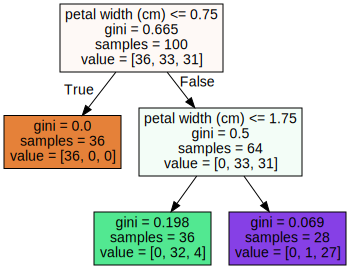

In [48]:
import graphviz
from IPython.core.display import display

with open("first_tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [49]:
from sklearn.tree import export_text

tree_rules = export_text(first_tree, feature_names=list(X.columns))
print(tree_rules)

|--- petal width (cm) <= 0.75
|   |--- class: 0
|--- petal width (cm) >  0.75
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



In [50]:
prediction = first_tree.predict(X_test)
prediction

array(['0', '1', '1', '2', '2', '1', '1', '2', '1', '2', '2', '0', '2',
       '1', '2', '2', '2', '1', '2', '0', '2', '0', '1', '0', '1', '1',
       '2', '1', '2', '0', '2', '2', '0', '2', '2', '1', '1', '1', '0',
       '0', '1', '2', '0', '1', '1', '0', '1', '0', '0', '0'],
      dtype=object)

In [53]:
np.array(y_test)

array(['0', '1', '1', '2', '2', '1', '1', '2', '1', '2', '2', '0', '2',
       '2', '2', '2', '2', '1', '2', '0', '2', '0', '1', '0', '1', '1',
       '2', '1', '2', '0', '2', '2', '0', '2', '2', '1', '1', '1', '0',
       '0', '1', '2', '0', '1', '1', '0', '1', '0', '0', '0'],
      dtype=object)

In [55]:
accuracy_score(y_test, prediction)

0.98

# Модель RandomForest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

RandomForestClassifier()

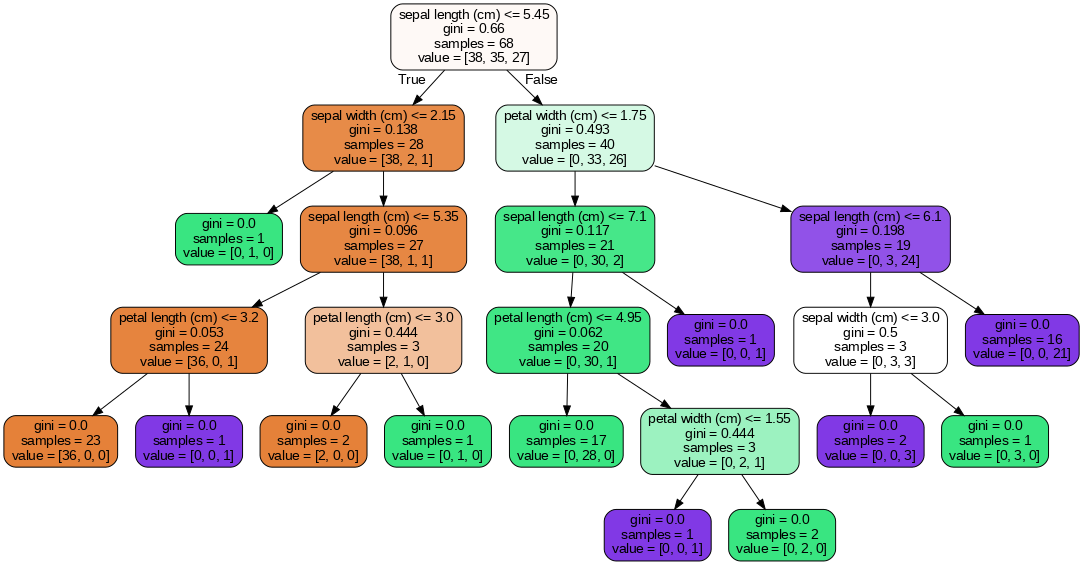

In [58]:
from sklearn.tree import export_graphviz

for tree_in_forest in RFC.estimators_:
  export_graphviz(
      tree_in_forest,
      out_file='/content/tree.dot',
      feature_names=X_train.columns,
      rounded=True,
      filled=True,
      proportion=False
  )
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'RFC_tree.png', '-Gdpi=70'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'RFC_tree.png')

In [59]:
RFC.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=365693593),
 DecisionTreeClassifier(max_features='sqrt', random_state=1860439783),
 DecisionTreeClassifier(max_features='sqrt', random_state=275258956),
 DecisionTreeClassifier(max_features='sqrt', random_state=1916615636),
 DecisionTreeClassifier(max_features='sqrt', random_state=463703440),
 DecisionTreeClassifier(max_features='sqrt', random_state=64542278),
 DecisionTreeClassifier(max_features='sqrt', random_state=244844912),
 DecisionTreeClassifier(max_features='sqrt', random_state=90400861),
 DecisionTreeClassifier(max_features='sqrt', random_state=1514768971),
 DecisionTreeClassifier(max_features='sqrt', random_state=673657264),
 DecisionTreeClassifier(max_features='sqrt', random_state=1430517643),
 DecisionTreeClassifier(max_features='sqrt', random_state=901142713),
 DecisionTreeClassifier(max_features='sqrt', random_state=1532180916),
 DecisionTreeClassifier(max_features='sqrt', random_state=1310330314),
 DecisionTreeCla

In [60]:
tree_rules = export_text(RFC.estimators_[0], feature_names=list(X.columns))
print(tree_rules)

|--- petal length (cm) <= 2.70
|   |--- class: 0.0
|--- petal length (cm) >  2.70
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1.0
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2.0
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.70
|   |   |   |--- petal length (cm) <= 5.35
|   |   |   |   |--- class: 1.0
|   |   |   |--- petal length (cm) >  5.35
|   |   |   |   |--- class: 2.0
|   |   |--- petal width (cm) >  1.70
|   |   |   |--- class: 2.0



In [61]:
prediction = RFC.predict(X_test)
prediction

array(['0', '1', '1', '2', '2', '1', '1', '2', '1', '2', '2', '0', '2',
       '1', '2', '2', '2', '1', '2', '0', '2', '0', '1', '0', '1', '1',
       '2', '1', '2', '0', '2', '2', '0', '2', '2', '1', '1', '1', '0',
       '0', '1', '2', '0', '1', '1', '0', '1', '0', '0', '0'],
      dtype=object)

In [63]:
accuracy_score(y_test, prediction)

0.98

Точность одинаковая, а деревьев стало намного больше

In [65]:
# важнее всего 2 характеристики, которые являются коррелируемыми (petal length (cm), petal width (cm))
important_columns = pd.Series(data=RFC.feature_importances_, index=X_train.columns)

important_columns.sort_values(ascending=False, inplace=False)

petal length (cm)    0.431644
petal width (cm)     0.408726
sepal length (cm)    0.125050
sepal width (cm)     0.034579
dtype: float64

## Подбор гиперпараметров

In [66]:
from sklearn.model_selection import GridSearchCV
import numpy as np

depths = np.arange(1, 21)
features = [.25, .5, .7, 1]  # Количество признаков, которые следует учитывать при поиске наилучшего разделения
samples_leaf = list(range(5, 100, 10))  # Минимальное количество образцов, допустимое в листе

tree_params = {'criterion':['gini','entropy'], 'max_depth': depths,  'max_features': features, 'min_samples_leaf': samples_leaf}

tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=3, n_jobs=-1)
tree_grid

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'max_features': [0.25, 0.5, 0.7, 1],
                         'min_samples_leaf': [5, 15, 25, 35, 45, 55, 65, 75, 85,
                                              95]})

In [68]:
tree_grid.fit(X_train, y_train)
print(tree_grid.best_score_, tree_grid.best_params_)

0.9497920380273323 {'criterion': 'gini', 'max_depth': 14, 'max_features': 0.7, 'min_samples_leaf': 5}


In [70]:
tree_bp = DecisionTreeClassifier(criterion='gini', max_depth=14, max_features=0.7, min_samples_leaf=5)
tree_bp.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=14, max_features=0.7, min_samples_leaf=5)

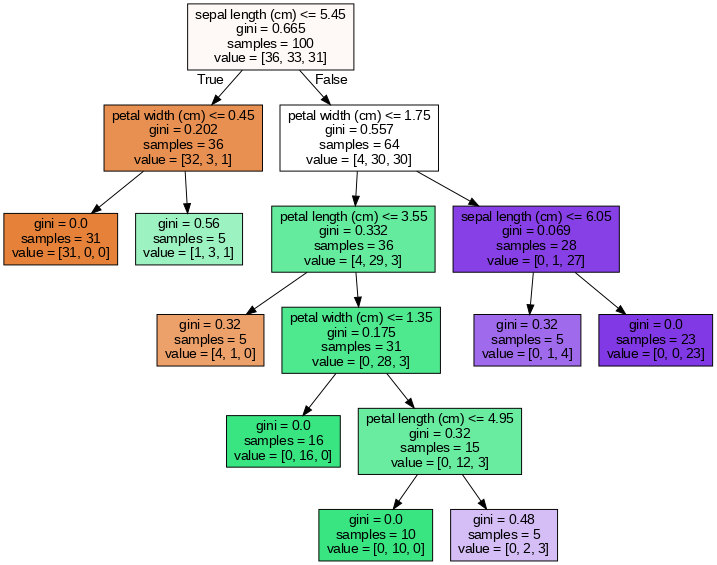

In [71]:
from sklearn.tree import export_graphviz, export_text

export_graphviz(tree_bp, out_file='tree_bp.dot', feature_names=X_train.columns, filled=True, proportion=False)

with open("tree_bp.dot") as f:
    dot_graph = f.read()

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree_bp.dot', '-o', 'tree_bp.png', '-Gdpi=70'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree_bp.png')

In [72]:
tree_rules = export_text(tree_bp, feature_names=list(X.columns))
print(tree_rules)

|--- sepal length (cm) <= 5.45
|   |--- petal width (cm) <= 0.45
|   |   |--- class: 0
|   |--- petal width (cm) >  0.45
|   |   |--- class: 1
|--- sepal length (cm) >  5.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 3.55
|   |   |   |--- class: 0
|   |   |--- petal length (cm) >  3.55
|   |   |   |--- petal width (cm) <= 1.35
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.35
|   |   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- sepal length (cm) <= 6.05
|   |   |   |--- class: 2
|   |   |--- sepal length (cm) >  6.05
|   |   |   |--- class: 2



In [73]:
prediction = tree_bp.predict(X_test)
prediction

array(['0', '1', '1', '2', '2', '1', '1', '2', '1', '2', '2', '0', '2',
       '2', '2', '2', '2', '1', '2', '0', '2', '1', '1', '0', '1', '1',
       '2', '1', '2', '0', '2', '2', '0', '2', '2', '1', '1', '1', '0',
       '0', '1', '2', '0', '1', '1', '0', '1', '0', '0', '0'],
      dtype=object)

In [74]:
accuracy_score(y_test, prediction)

0.98

In [75]:
X_train.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [76]:
{col:0 for col in X_train.columns}

{'sepal length (cm)': 0,
 'sepal width (cm)': 0,
 'petal length (cm)': 0,
 'petal width (cm)': 0}

In [78]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [79]:
example = {
    'sepal length (cm)': 4.7,
    'sepal width (cm)': 4.0,
    'petal length (cm)': 1.3,
    'petal width (cm)': 0.6
}

In [80]:
example_df = pd.DataFrame(data=[example])
example_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,4.7,4.0,1.3,0.6


In [81]:
first_tree.predict(example_df)

array(['0'], dtype=object)

In [82]:
probability = pd.Series(data=first_tree.predict_proba(example_df)[0], index=first_tree.classes_)
probability.sort_values(ascending=False)

0    1.0
1    0.0
2    0.0
dtype: float64

In [83]:
tree_bp.predict(example_df)

array(['1'], dtype=object)

In [84]:
tree_bp.predict_proba(example_df)[0]

array([0.2, 0.6, 0.2])

In [85]:
probability = pd.Series(data=tree_bp.predict_proba(example_df)[0], index=tree_bp.classes_)
probability.sort_values(ascending=False)

1    0.6
0    0.2
2    0.2
dtype: float64

In [86]:
RFC.predict(example_df)

array(['0'], dtype=object)

In [87]:
probability = pd.Series(data=RFC.predict_proba(example_df)[0], index=RFC.classes_)
probability.sort_values(ascending=False)

0    1.0
1    0.0
2    0.0
dtype: float64

In [88]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,group
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


Дерево с подобранными параметрами определило как 1 класс (versicolor), в то время, как остальные определили как 0 (setosa)

Наибольшую точность показали деревья решений и лес (0.98), за ними идет метод опорных векторов, который показвл точность 0.96 на наилучших параметрах, менее точным оказался наивный байес, который показывал точность около 0.9